<a href="https://colab.research.google.com/github/hany69x/YAZAKI/blob/main/ERSTE_WORKING_Yazaki_DATSET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install prophet
! pip install pystan

In [15]:
path ="/content/drive/MyDrive/DataSet/YazakiDSET.csv"
df = pd.read_csv(path)

In [16]:
import pandas as pd
from prophet import Prophet

In [17]:
print(df.head())


  Row Labels  Sum of 202312  Sum of 202313  Sum of 202314  Sum of 202315  \
0     Line 1          17765          22020        22780.0        22420.0   
1   Line 1-2            858           1078         1386.0         1738.0   
2     Line 2          14226          15402        17610.0        22088.0   
3     Line 3          20188          14657        20951.0        24177.0   
4     Line 4          12186          11103        11915.0        14234.0   

   Sum of 202317  Sum of 202319  Sum of 202320  Sum of 202321  Sum of 202322  \
0        11930.0        22350.0        13075.0        21200.0          18100   
1         1943.0         1943.0         1804.0         1870.0           4950   
2        13651.0        14258.0        19480.0        14594.0          17184   
3        17152.0        19243.0        18615.0        20435.0          16735   
4        12190.0         8133.0         9608.0        10556.0           8533   

   ...  Sum of 202402  Sum of 202403  Sum of 202404  Sum of 20

In [ ]:
print(df.columns)


Index(['Row Labels', '202312', '202313', '202314', '202315', '202317',
       '202319', '202320', '202321', '202322', '202318', '202316', '202323',
       '202324', '202338', '202339', '202340', '202344', '202346', '202350',
       '202348', '202347', '202345', '202343', '202342', '202341', '202325',
       '202326', '202327', '202328', '202329', '202330', '202331', '202332',
       '202333', '202334', '202335', '202336', '202337', '202349', '202351',
       '202352', '202401', '202402', '202403', '202404', '202405', '202407',
       '202406', '202408', '202409', '202410', '202411'],
      dtype='object')


In [ ]:
# Load the dataset
path = "/content/drive/MyDrive/DataSet/YazakiDSET.csv"
df = pd.read_csv(path)

# Inspect the first few rows and column names
print(df.head())
print(df.columns)

# Assuming your dataset has the first row as column names like 'Sum of 202312', 'Sum of 202313', ...
# Remove the 'Sum of ' prefix from the column names
df.columns = [col.replace('Sum of ', '') for col in df.columns]

# Verify the column names after replacement
print(df.columns)

# Check if 'line' is the correct id_var or if it needs to be replaced
if 'line' not in df.columns:
    print("Column 'line' not found in the dataframe. Please check the column names.")
else:
    # Melt the dataframe to long format
    df_long = df.melt(id_vars=['line'], var_name='week_year', value_name='value')

    # Extract year and week from the 'week_year' column
    df_long['year'] = df_long['week_year'].str[:4].astype(int)
    df_long['week'] = df_long['week_year'].str[4:].astype(int)

    # Convert year and week to a datetime
    df_long['ds'] = pd.to_datetime(df_long['year'].astype(str) + df_long['week'].astype(str) + '0', format='%Y%W%w')

    # Filter out non-numeric rows (like 'grand total') if necessary
    df_long = df_long[pd.to_numeric(df_long['value'], errors='coerce').notnull()]

    # Rename columns for Prophet
    df_prophet = df_long[['ds', 'value']].rename(columns={'value': 'y'})

    # Train the Prophet model
    m = Prophet()
    m.fit(df_prophet)

    # Make future predictions
    future = m.make_future_dataframe(periods=52, freq='W')
    forecast = m.predict(future)

    # Visualize the forecast
    fig = m.plot(forecast)
    fig.show()

    # Optionally save the forecast
    forecast.to_csv('forecast.csv', index=False)


  Row Labels  Sum of 202312  Sum of 202313  Sum of 202314  Sum of 202315  \
0     Line 1          17765          22020        22780.0        22420.0   
1   Line 1-2            858           1078         1386.0         1738.0   
2     Line 2          14226          15402        17610.0        22088.0   
3     Line 3          20188          14657        20951.0        24177.0   
4     Line 4          12186          11103        11915.0        14234.0   

   Sum of 202317  Sum of 202319  Sum of 202320  Sum of 202321  Sum of 202322  \
0        11930.0        22350.0        13075.0        21200.0          18100   
1         1943.0         1943.0         1804.0         1870.0           4950   
2        13651.0        14258.0        19480.0        14594.0          17184   
3        17152.0        19243.0        18615.0        20435.0          16735   
4        12190.0         8133.0         9608.0        10556.0           8533   

   ...  Sum of 202402  Sum of 202403  Sum of 202404  Sum of 20

In [ ]:
print(df.head())
print(df.columns)



  Row Labels  Sum of 202312  Sum of 202313  Sum of 202314  Sum of 202315  \
0     Line 1          17765          22020        22780.0        22420.0   
1   Line 1-2            858           1078         1386.0         1738.0   
2     Line 2          14226          15402        17610.0        22088.0   
3     Line 3          20188          14657        20951.0        24177.0   
4     Line 4          12186          11103        11915.0        14234.0   

   Sum of 202317  Sum of 202319  Sum of 202320  Sum of 202321  Sum of 202322  \
0        11930.0        22350.0        13075.0        21200.0          18100   
1         1943.0         1943.0         1804.0         1870.0           4950   
2        13651.0        14258.0        19480.0        14594.0          17184   
3        17152.0        19243.0        18615.0        20435.0          16735   
4        12190.0         8133.0         9608.0        10556.0           8533   

   ...  Sum of 202402  Sum of 202403  Sum of 202404  Sum of 20

Index(['Row Labels', '202312', '202313', '202314', '202315', '202317',
       '202319', '202320', '202321', '202322', '202318', '202316', '202323',
       '202324', '202338', '202339', '202340', '202344', '202346', '202350',
       '202348', '202347', '202345', '202343', '202342', '202341', '202325',
       '202326', '202327', '202328', '202329', '202330', '202331', '202332',
       '202333', '202334', '202335', '202336', '202337', '202349', '202351',
       '202352', '202401', '202402', '202403', '202404', '202405', '202407',
       '202406', '202408', '202409', '202410', '202411'],
      dtype='object')


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbg4ukprb/l_7bo9yf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbg4ukprb/74888_kt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53964', 'data', 'file=/tmp/tmpbg4ukprb/l_7bo9yf.json', 'init=/tmp/tmpbg4ukprb/74888_kt.json', 'output', 'file=/tmp/tmpbg4ukprb/prophet_modelsr737wf2/prophet_model-20240517153305.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:33:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:33:05 - cmdstanpy - INFO - Chain

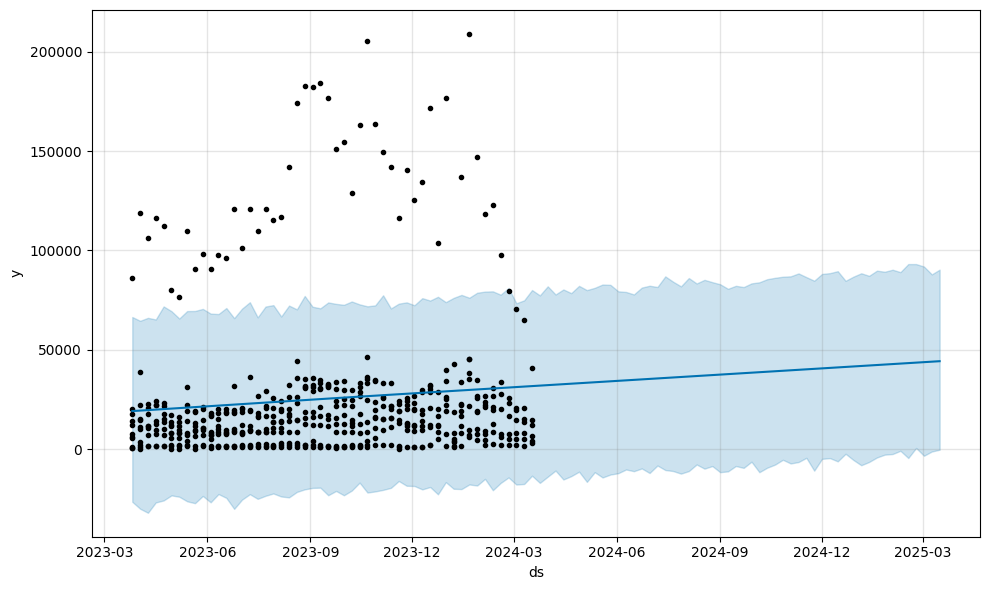

In [ ]:
# Remove the 'Sum of ' prefix from the column names
df.columns = [col.replace('Sum of ', '') for col in df.columns]

# Verify the column names after replacement
print(df.columns)

# Melt the dataframe to long format
df_long = df.melt(id_vars=['Row Labels'], var_name='week_year', value_name='value')

# Extract year and week from the 'week_year' column
df_long['year'] = df_long['week_year'].str[:4].astype(int)
df_long['week'] = df_long['week_year'].str[4:].astype(int)

# Convert year and week to a datetime
df_long['ds'] = pd.to_datetime(df_long['year'].astype(str) + df_long['week'].astype(str) + '0', format='%Y%W%w')

# Filter out non-numeric rows (like 'grand total') if necessary
df_long = df_long[pd.to_numeric(df_long['value'], errors='coerce').notnull()]

# Rename columns for Prophet
df_prophet = df_long[['ds', 'value']].rename(columns={'value': 'y'})

# Train the Prophet model
m = Prophet()
m.fit(df_prophet)

# Make future predictions
future = m.make_future_dataframe(periods=52, freq='W')
forecast = m.predict(future)

# Visualize the forecast
fig = m.plot(forecast)
fig.show()

# Optionally save the forecast
forecast.to_csv('forecast.csv', index=False)
